In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [5]:
# loading preprocessed data into dataframe using panda library
df = pd.read_csv('Chirumamilla_pp.csv')
df = df.replace({'income': '>50K'},1)
df = df.replace({'income': '<=50K'},0)
data = df.copy()
data = data.drop('Unnamed: 0',axis = 1)
x = data.drop('income',axis=1)
y = data['income']
df

,Unnamed: 0,capital-gain,education-num,age,hours-per-week,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,education_level_ 10th,education_level_ 11th,education_level_ 12th,education_level_ 1st-4th,education_level_ 5th-6th,education_level_ 7th-8th,education_level_ 9th,education_level_ Assoc-acdm,education_level_ Assoc-voc,education_level_ Bachelors,education_level_ Doctorate,education_level_ HS-grad,education_level_ Masters,education_level_ Preschool,education_level_ Prof-school,education_level_ Some-college,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,sex_ Female,sex_ Male,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,income
0,0,0.098639,0.800000,0.360656,0.492958,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,1,0.000000,0.800000,0.540984,0.112676,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,2,0.000000,0.533333,0.344262,0.492958,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,3,0.000000,0.400000,0.590164,0.492958,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
4,4,0.000000,0.800000,0.180328,0.492958,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,45217,0.000000,0.800000,0.262295,0.492958,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
45218,45218,0.000000,0.800000,0.360656,0.436620,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
45219,45219,0.000000,0.800000,0.344262,0.633803,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
45220,45220,0.247505,0.800000,0.442623,0.492958,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0


In [0]:
# splitting data into testing and training data with 40% holdout
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.4)


In [7]:
# Training and testing model with DecisionTreeClassifier with differnt TreeDepths and impurity as entropy
Training_score = []
Testing_score = []
Treedepth = []
rt = pd.DataFrame(columns= ['TreeDepth','Training score','Testing score'])
for TreeDepth in range(1,20) :
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=TreeDepth, random_state=0)
    clf.fit(X_train,y_train)
    Training_score.append(clf.score(X_train,y_train))
    Testing_score.append(clf.score(X_test,y_test))
    Treedepth.append(TreeDepth)
rt['TreeDepth'] = Treedepth
rt['Training score'] = Training_score
rt['Testing score'] = Testing_score
rt



,TreeDepth,Training score,Testing score
0,1,0.752921,0.751009
1,2,0.822025,0.821328
2,3,0.836988,0.835757
3,4,0.837136,0.835922
4,5,0.838684,0.836696
5,6,0.843585,0.842777
6,7,0.847455,0.845707
7,8,0.850035,0.844491
8,9,0.852799,0.844933
9,10,0.856964,0.841948


In [8]:
# Training and testing model with DecisionTreeClassifier with differnt TreeDepths and impurity as gini
Training_scoreg = []
Testing_scoreg = []
Treedepthg = []
rtg = pd.DataFrame(columns= ['TreeDepth','Training score','Testing score'])
for TreeDepth in range(1,20) :
    clfg = DecisionTreeClassifier(criterion='gini', max_depth=TreeDepth, random_state=50)
    clfg.fit(X_train,y_train)
    Training_scoreg.append(clfg.score(X_train,y_train))
    Testing_scoreg.append(clfg.score(X_test,y_test))
    Treedepthg.append(TreeDepth)
rtg['TreeDepth'] = Treedepthg
rtg['Training score'] = Training_scoreg
rtg['Testing score'] = Testing_scoreg
rtg

,TreeDepth,Training score,Testing score
0,1,0.752921,0.751009
1,2,0.822025,0.821328
2,3,0.836988,0.835757
3,4,0.838204,0.836917
4,5,0.840158,0.838686
5,6,0.842074,0.840234
6,7,0.843770,0.839792
7,8,0.852615,0.844325
8,9,0.856337,0.842059
9,10,0.861497,0.843385


[Text(0, 0.5, 'Classification Accuracy'), Text(0.5, 0, 'Tree Depth')]

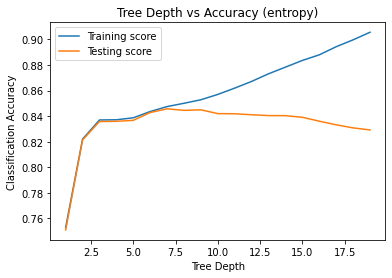

In [9]:
ax = rt.plot.line(x='TreeDepth', y=['Training score','Testing score'], title='Tree Depth vs Accuracy (entropy)')
ax.set(xlabel="Tree Depth", ylabel="Classification Accuracy")

[Text(0, 0.5, 'Classification Accuracy'), Text(0.5, 0, 'Tree Depth')]

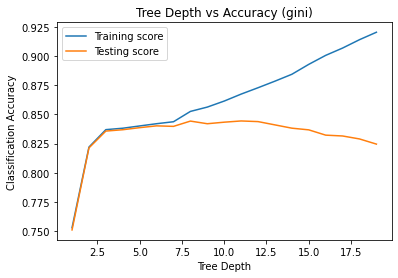

In [10]:
ax = rtg.plot.line(x='TreeDepth', y=['Training score','Testing score'], title='Tree Depth vs Accuracy (gini)')
ax.set(xlabel="Tree Depth", ylabel="Classification Accuracy")

In [11]:
#  Training and testing model with KNNClassifier with differnt K values
knnscores = pd.DataFrame(columns= ['K','Training score','Testing score'])
Training_score = []
Testing_score = []
k =[]
for i in range(1,15) :
    knnclf = KNeighborsClassifier(n_neighbors=i, p=1, metric='minkowski')
    knnclf.fit(X_train,y_train)
    Training_score.append(knnclf.score(X_train,y_train))
    Testing_score.append(knnclf.score(X_test,y_test))
    k.append(i)
knnscores['K'] = k
knnscores['Training score'] = Training_score
knnscores['Testing score'] = Testing_score
knnscores


,K,Training score,Testing score
0,1,0.961265,0.792636
1,2,0.886227,0.808060
2,3,0.888254,0.815247
3,4,0.871890,0.820056
4,5,0.872738,0.822599
5,6,0.863966,0.824755
6,7,0.864556,0.826359
7,8,0.858843,0.828791
8,9,0.858659,0.827354
9,10,0.854789,0.829399


[Text(0, 0.5, 'Classification Accuracy'), Text(0.5, 0, 'K')]

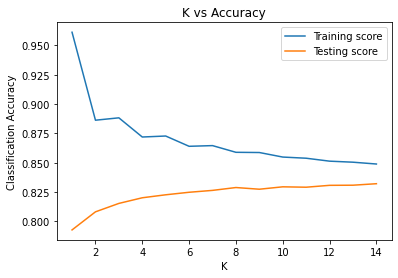

In [15]:
ax = knnscores.plot.line(x='K', y=['Training score','Testing score'], title='K vs Accuracy')
ax.set(xlabel="K", ylabel="Classification Accuracy")

[[9260 4325]
 [ 489 4015]]
Training Score 0.7345667637194561
Testing Score 0.7338714135662557


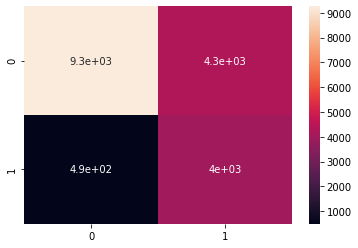

In [23]:
# Training and testing model with naivebayes GaussianNB and scores respectively stored
clfnv = GaussianNB()
clfnv.fit(X_train,y_train)
y_pred = clfnv.predict(X_test)
x = confusion_matrix(y_test,y_pred)
print(x)
sns.heatmap(x, annot=True)
print('Training Score {}'.format( clfnv.score(X_train,y_train)))
print('Testing Score {}'.format( clfnv.score(X_test,y_test)))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[[12609   976]
 [ 1886  2618]]
Training Score 0.8441381343751152
Testing Score 0.8417822986345292 


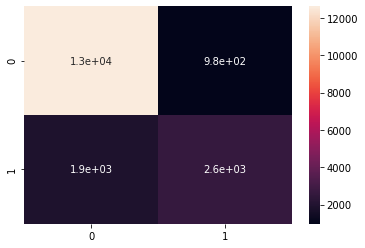

In [21]:
# Training and Testing model with Logistic regression

clflg = LogisticRegression()
clflg.fit(X_train,y_train)
y_pred = clflg.predict(X_test)
x = confusion_matrix(y_test,y_pred)
print(x)
sns.heatmap(x, annot=True)
print('Training Score {}'.format(clflg.score(X_train,y_train)))
print('Testing Score {} '.format(clflg.score(X_test,y_test)))